In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df=df.drop('day',axis=1)
df=df.drop('month',axis=1)
df=df.drop('year',axis=1)

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [14]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
#Standardizing the values
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

<Axes: >

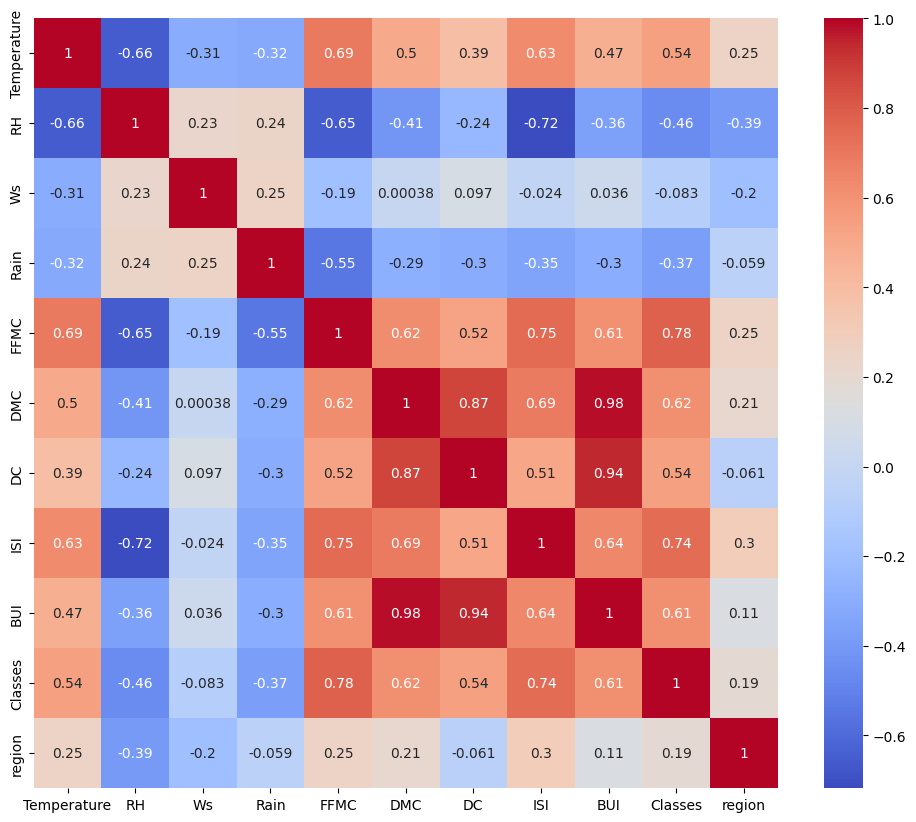

In [19]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
#removing correlated features having correlaition greater than a threshold of 85%
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
        return col_corr

In [21]:
corr_features=correlation(x_train,0.85)

In [22]:
corr_features

{'DC'}

In [23]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [24]:
sc=StandardScaler()

In [25]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [26]:
#Ridge Regression
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)

Ridge()

In [27]:
y_pred=ridge.predict(x_test_scaled)

In [28]:
r2_score(y_test,y_pred) #without any kind of cross validation

0.9880662366312485

In [30]:
#Elasticnet
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)

ElasticNet()

In [31]:
y_pred=elastic.predict(x_test_scaled)

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [33]:
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 1.7103643390583434
MSE: 4.424118975044605
RMSE: 2.1033589743656704
R2: 0.9000437254338121


In [34]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
ridge=Ridge()
lr=LinearRegression()
lasso=Lasso()

In [35]:
rkf=RepeatedKFold(n_splits=5,n_repeats=3,random_state=42)

In [36]:
scores1=cross_val_score(ridge,x_train_scaled,y_train,scoring='r2',cv=rkf)
scoremae=cross_val_score(ridge,x_train_scaled,y_train,scoring='neg_mean_absolute_error',cv=rkf)

In [37]:
scores2=cross_val_score(lr,x_train_scaled,y_train,scoring='r2',cv=rkf)

In [38]:
scores3=cross_val_score(lasso,x_train_scaled,y_train,scoring='r2',cv=rkf)

In [39]:
print("scores1 ridge",scores1.mean())
print("scores2 linear",scores2.mean())
print("scores3 Lasso",scores3.mean())
print("scoremae",scoremae.mean())

scores1 ridge 0.96471465679552
scores2 linear 0.9643927339221225
scores3 Lasso 0.9411408687152433
scoremae -0.7537897552630979


In [40]:
#Pickling the project and deploying it in AWS
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [41]:
from sklearn.model_selection import RepeatedKFold,cross_val_score

In [ ]:
mean_fwi = y_train.mean()
baseline_mae = np.mean(np.abs(y_test - mean_fwi))
print("Baseline MAE:", baseline_mae)

Baseline MAE: 5.307223923617366


In [44]:
import os
if not os.path.exists("static"):
    os.makedirs("static")

In [45]:
plt.figure()
df['Classes'].value_counts().plot(kind='bar')
plt.title("Fire vs Not Fire Distribution")
plt.savefig("static/class_distribution.png")
plt.close()

In [46]:
plt.savefig("static/class_distribution.png")

<Figure size 640x480 with 0 Axes>